# Stacked bar change rate

This notebook recreates the provided stacked flow chart using dartwork-mpl styling.

In [7]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
import numpy as np

import dartwork_mpl as dm

dm.style.use_preset("scientific")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
def stack_bottoms(values):
    """
    Calculate bottom positions for stacked bars.

    Parameters
    ----------
    values : list
        List of values to stack from bottom to top.

    Returns
    -------
    bottoms : list
        Bottom y-coordinates for each bar segment.
    total : float
        Total height of the stacked bars.
    """
    bottoms = [0] * len(values)
    y = 0
    for i in range(len(values) - 1, -1, -1):
        bottoms[i] = y
        y += values[i]
    return bottoms, y


def text_color(fill):
    """
    Determine text color (black or white) based on background luminance.

    Parameters
    ----------
    fill : str
        Color name or hex code.

    Returns
    -------
    str
        'black' for light backgrounds, 'white' for dark backgrounds.
    """
    r, g, b = mcolors.to_rgb(fill)
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return "black" if luminance > 0.6 else "white"

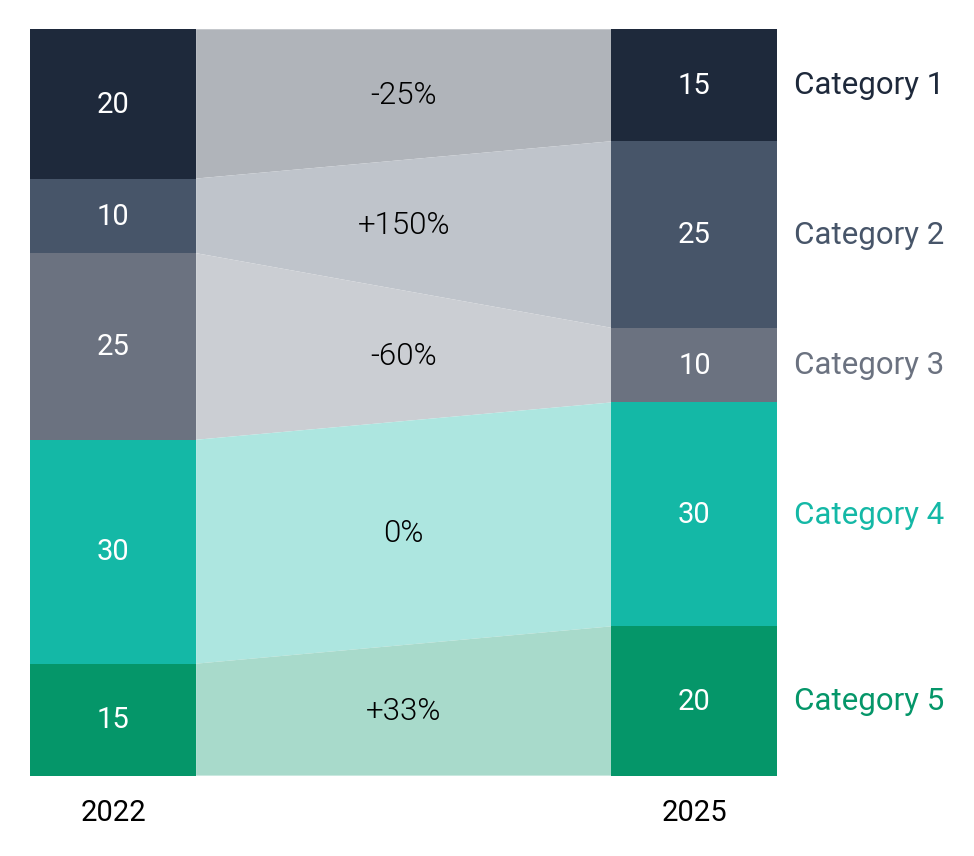

In [9]:
# Data: (label, left_value, right_value) for each category
categories = [
    ("Category 1", 20, 15),
    ("Category 2", 10, 25),
    ("Category 3", 25, 10),
    ("Category 4", 30, 30),
    ("Category 5", 15, 20),
]

# Color palette for each category
colors = [
    "tw.slate800",
    "tw.slate600",
    "tw.gray500",
    "tw.teal500",
    "tw.emerald600",
]

# Layout parameters
left_x, right_x = 0.0, 0.7
bar_width = 0.2
label_offset = 0.02  # Distance between bar and category label
band_x = [left_x + bar_width, right_x]

# Extract values and calculate stack positions
values_left = [c[1] for c in categories]
values_right = [c[2] for c in categories]
left_bottoms, left_total = stack_bottoms(values_left)
right_bottoms, right_total = stack_bottoms(values_right)

# Create figure
fig, ax = plt.subplots(figsize=(dm.cm2in(8), dm.cm2in(7)), dpi=300)

# Draw bars, labels, and connecting polygons for each category
for idx, (label, left_val, right_val) in enumerate(categories):
    lb, rb = left_bottoms[idx], right_bottoms[idx]
    color = colors[idx]

    # Draw stacked bars
    ax.add_patch(
        plt.Rectangle((left_x, lb), bar_width, left_val, color=color, linewidth=0)
    )
    ax.add_patch(
        plt.Rectangle((right_x, rb), bar_width, right_val, color=color, linewidth=0)
    )

    # Add value labels inside bars
    ax.text(
        left_x + bar_width / 2,
        lb + left_val / 2,
        f"{left_val}",
        ha="center",
        va="center",
        fontsize=dm.fs(-0.5),
        color=text_color(color),
        weight=dm.fw(1),
    )
    ax.text(
        right_x + bar_width / 2,
        rb + right_val / 2,
        f"{right_val}",
        ha="center",
        va="center",
        fontsize=dm.fs(-0.5),
        color=text_color(color),
        weight=dm.fw(1),
    )

    # Add category label to the right of the right bar
    ax.text(
        right_x + bar_width + label_offset,
        rb + right_val / 2,
        label,
        ha="left",
        va="center",
        fontsize=dm.fs(0),
        color=color,
        weight=dm.fw(1),
    )

    # Draw connecting polygon between bars
    left_top, left_bottom = lb + left_val, max(0, lb)
    right_top, right_bottom = rb + right_val, max(0, rb)
    polygon = Polygon(
        [
            [band_x[0], left_top],
            [band_x[1], right_top],
            [band_x[1], right_bottom],
            [band_x[0], left_bottom],
        ],
        closed=True,
        color=dm.pseudo_alpha(color, alpha=0.35),
        zorder=0,
        linewidth=0,
    )
    ax.add_patch(polygon)

    # Add percentage change label in the center of connecting polygon
    change_pct = (right_val - left_val) / left_val * 100
    change_label = f"+{change_pct:.0f}%" if change_pct > 0 else f"{change_pct:.0f}%"
    mid_x = np.mean(band_x)
    mid_y = (left_top + right_top + left_bottom + right_bottom) / 4
    ax.text(
        mid_x,
        mid_y,
        change_label,
        ha="center",
        va="center",
        fontsize=dm.fs(0),
        weight=dm.fw(0),
    )

# Add year labels below bars
ax.text(
    left_x + bar_width / 2,
    -3,
    "2022",
    ha="center",
    va="top",
    fontsize=dm.fs(-0.5),
    weight=dm.fw(1),
)
ax.text(
    right_x + bar_width / 2,
    -3,
    "2025",
    ha="center",
    va="top",
    fontsize=dm.fs(-0.5),
    weight=dm.fw(1),
)

# Set axis limits based on bar positions and label lengths
xlim_right = right_x + bar_width + label_offset + 0.05

ax.set_xlim(left_x, xlim_right)
ax.set_ylim(-6, max(left_total, right_total))
ax.axis("off")

dm.simple_layout(fig)
plt.show()
